In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 


In [3]:
# metadata 
print(bank_marketing.metadata) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
# variable information 
print(bank_marketing.variables) 

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

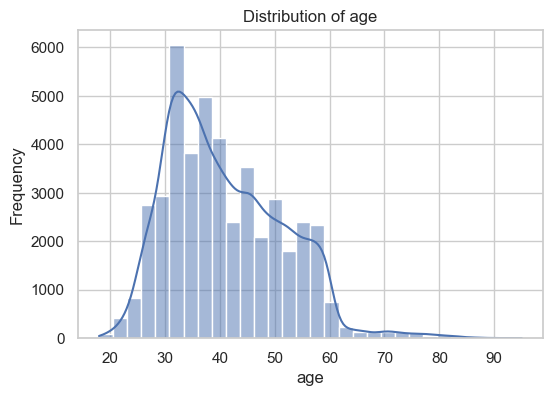

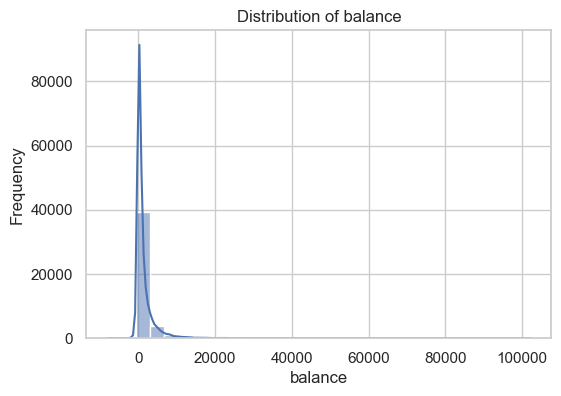

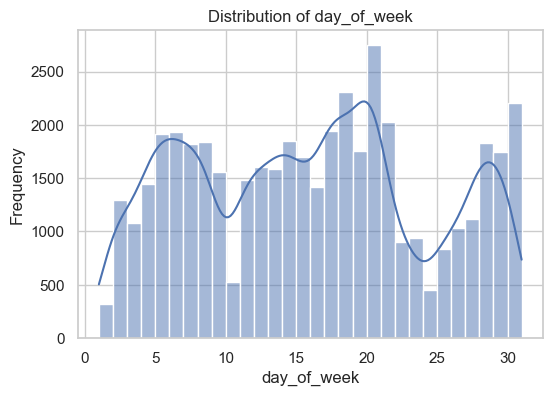

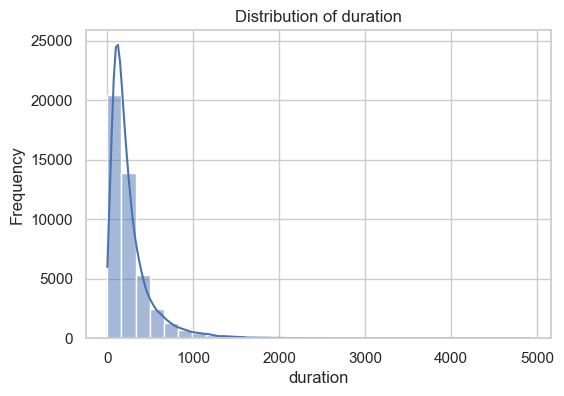

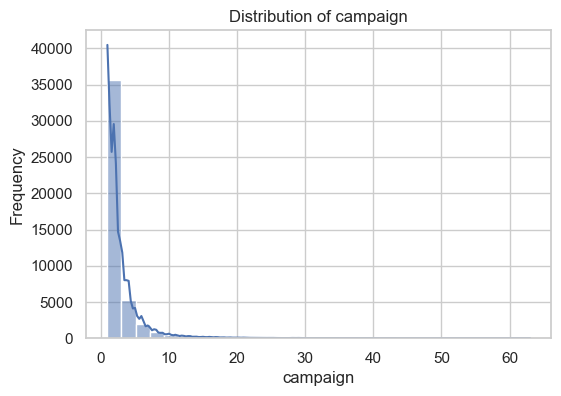

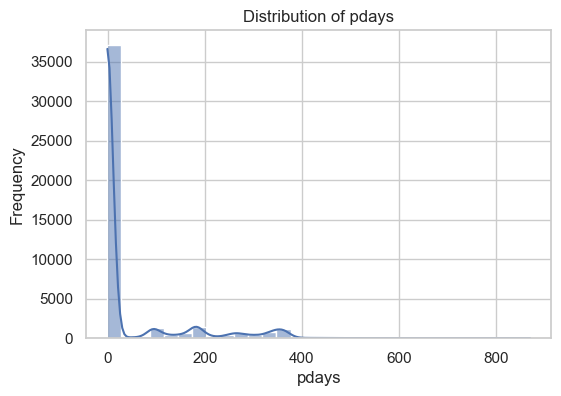

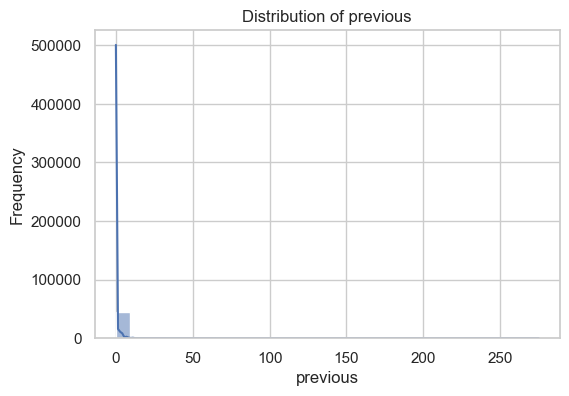

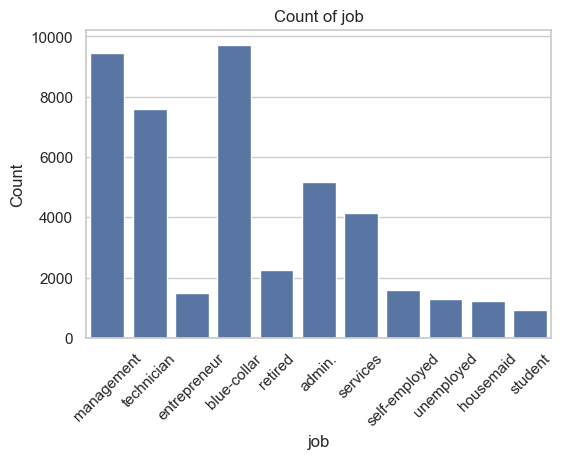

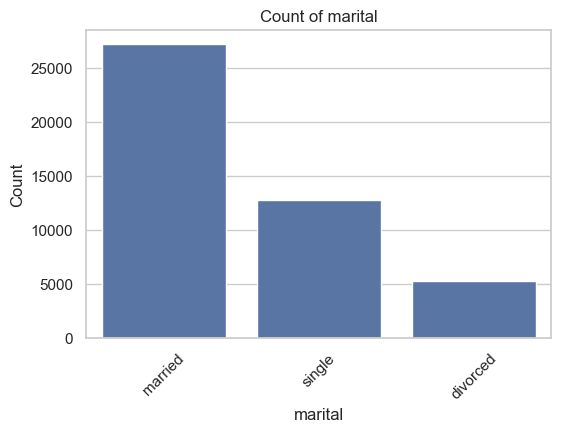

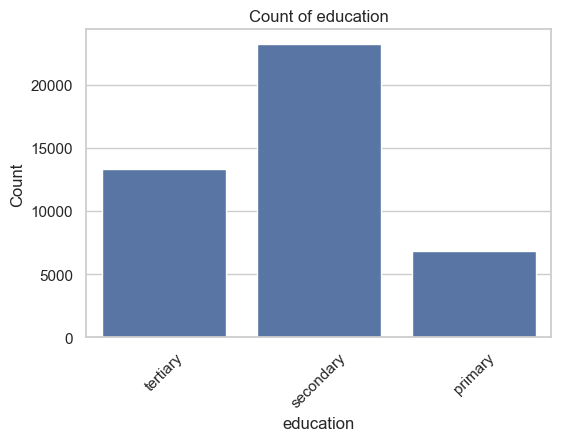

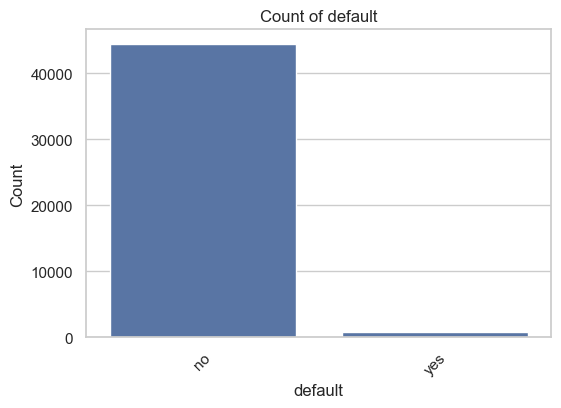

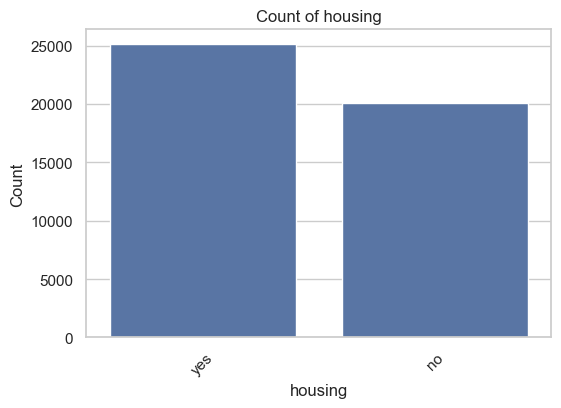

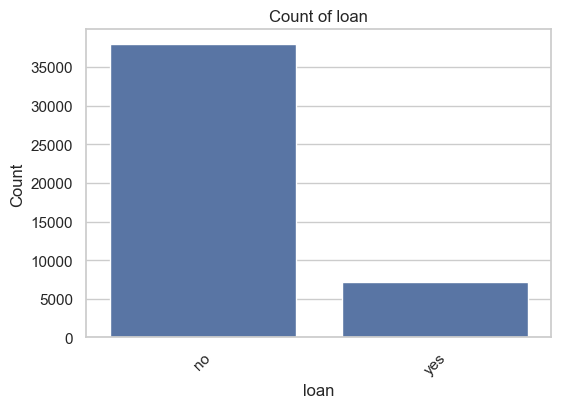

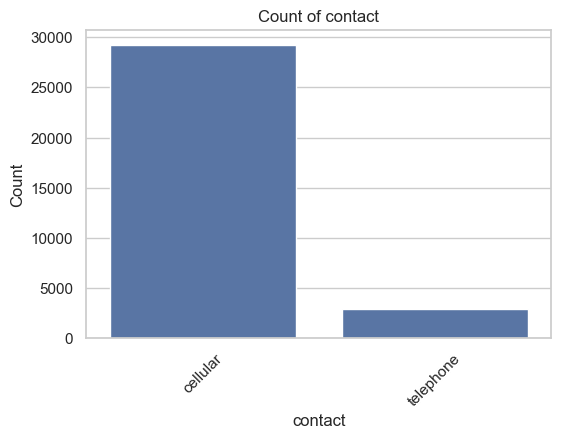

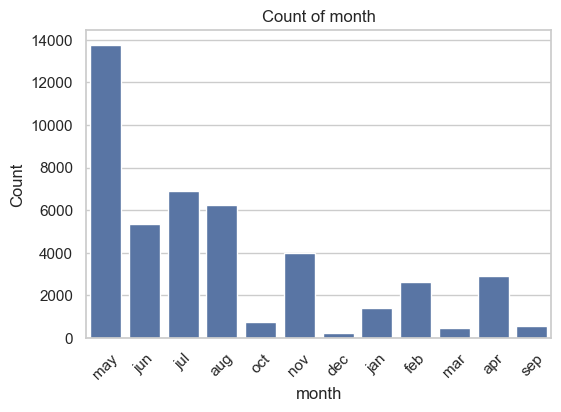

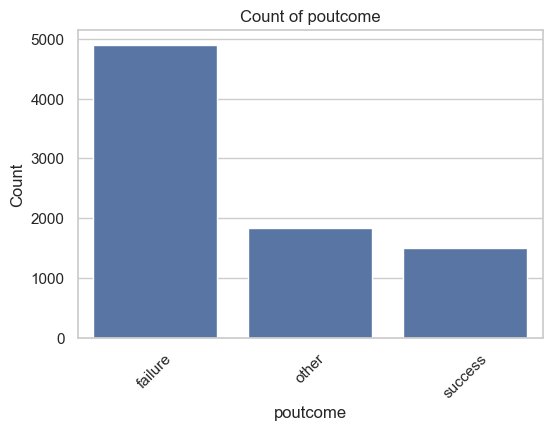

In [5]:
continuous_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

# Set general style
sns.set(style="whitegrid")

# Plot continuous features
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X, x=col)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [6]:
X.shape

(45211, 16)

In [7]:
X = X.dropna(subset=['job'])
y = y.loc[X.index]


In [8]:
job_fea = X['job'].copy()
marital_fea = X['marital'].copy()
education_fea = X['education'].copy()

In [9]:
X.isnull().sum()

age                0
job                0
marital            0
education       1730
default            0
balance            0
housing            0
loan               0
contact        12909
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36704
dtype: int64

In [10]:
y

,y
0,no
1,no
2,no
3,no
5,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [11]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

c:\Users\Asus\anaconda3\envs\dann\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\Asus\anaconda3\envs\dann\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


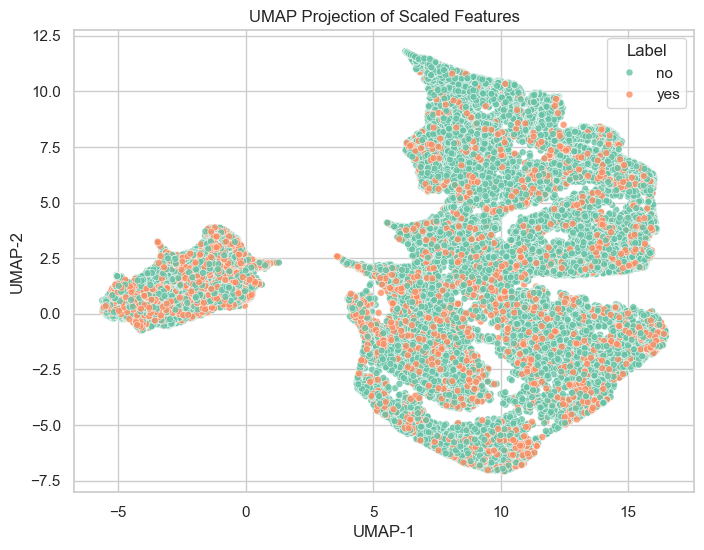

In [12]:

# 1. Select numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# 2. Scale the numeric data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=numeric_cols)

# 3. Combine scaled data with labels for plotting
df_plot = X_scaled.copy()
# y is a DataFrame with one column; convert to a 1D Series to avoid seaborn hue errors
df_plot['label'] = y.squeeze()

# 3. Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 4. Plot the 2D UMAP projection
plt.figure(figsize=(8, 6))
# pass a 1D series for hue (df_plot['label']) instead of the DataFrame y
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_plot['label'], palette='Set2', s=25, alpha=0.8)
plt.title("UMAP Projection of Scaled Features")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title='Label')
plt.show()